# **Global Terrorism Data Analysis**

**Introduction:**

Terrorism remains a critical global security issue. This project analyzes attack patterns,
geographical hotspots, and trends over time. Students will perform exploratory data analysis
(EDA) to uncover insights into terrorist activities worldwide.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**LOAD DATA**

In [60]:
gtd = pd.read_csv('globalterrorismdb_0718dist-Copy1.csv', encoding='ISO-8859-1') 
# or try other encoding like 'ISO-8859-1', 'cp1252' if 'latin-1' does not work')

In [62]:
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [66]:
gtd.shape

(181691, 135)

In [68]:
gtd.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [72]:
gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [74]:
pd.set_option('display.max_rows', 1000); 
gtd.nunique()

eventid               181691
iyear                     47
imonth                    13
iday                      32
approxdate              2244
extended                   2
resolution              1859
country                  205
country_txt              205
region                    12
region_txt                12
provstate               2855
city                   36673
latitude               48322
longitude              48039
specificity                5
vicinity                   3
location               44109
summary               112492
crit1                      2
crit2                      2
crit3                      2
doubtterr                  3
alternative                5
alternative_txt            5
multiple                   2
success                    2
suicide                    2
attacktype1                9
attacktype1_txt            9
attacktype2                9
attacktype2_txt            9
attacktype3                8
attacktype3_txt            8
targtype1     

In [76]:
gtd.isnull().any

<bound method DataFrame.any of         eventid  iyear  imonth   iday  approxdate  extended  resolution  \
0         False  False   False  False        True     False        True   
1         False  False   False  False        True     False        True   
2         False  False   False  False        True     False        True   
3         False  False   False  False        True     False        True   
4         False  False   False  False        True     False        True   
...         ...    ...     ...    ...         ...       ...         ...   
181686    False  False   False  False        True     False        True   
181687    False  False   False  False        True     False        True   
181688    False  False   False  False        True     False        True   
181689    False  False   False  False        True     False        True   
181690    False  False   False  False        True     False        True   

        country  country_txt  region  ...  addnotes  scite1  scite2 

In [80]:
pd.set_option('display.max_rows', 1000); 
gtd.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     435
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

There are 135 columns and extracting those columns which provide meaningful insights and renaming them here.

In [82]:
gtd.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'Attack_type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [86]:
New_data = gtd[['Year','Month','Day','Country','State','Region','city','latitude','longitude','Attack_type','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

**HANDLING MISSING VALUES**

In [92]:
New_data.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [94]:
New_data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              435
latitude         4556
longitude        4557
Attack_type         0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [96]:
New_data['State'].fillna(0,inplace=True)
New_data['city'].fillna(0,inplace=True)
New_data['latitude'].fillna(0,inplace=True)
New_data['longitude'].fillna(0,inplace=True)
New_data['Killed'].fillna(0,inplace=True)
New_data['Wounded'].fillna(0,inplace=True)
New_data['Target'].fillna(0,inplace=True)
New_data['Summary'].fillna(0,inplace=True)
New_data['Motive'].fillna(0,inplace=True) 
New_data['Group'].fillna(0,inplace=True)
New_data['Weapon_type'].fillna(0,inplace=True)

In [98]:
New_data.isnull().sum()

Year           0
Month          0
Day            0
Country        0
State          0
Region         0
city           0
latitude       0
longitude      0
Attack_type    0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

**Perform Exploratory Data Analysis (EDA)**


**Summary Statistics**


In [102]:
New_data.describe()


,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,22.909109,-4.471911e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.699442,2.021946e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,9.518645,1.231572e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.126646,4.314357e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.538561,6.835734e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


# **Visualize Attack Trends**


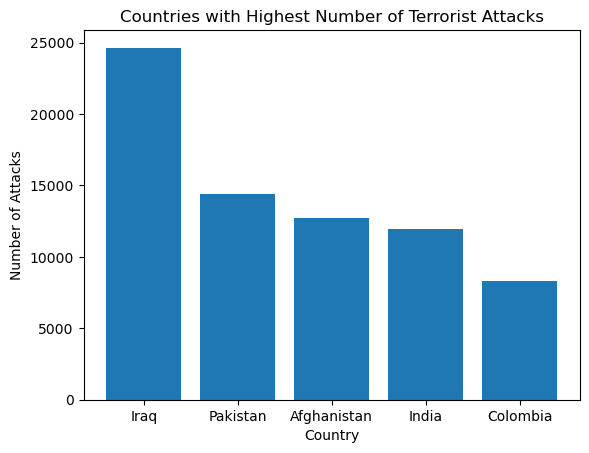

In [113]:
# Bar chart for country-wise attacks
country_attacks = New_data['Country'].value_counts().head(5)
plt.bar(country_attacks.index, country_attacks.values)
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Countries with Highest Number of Terrorist Attacks')
plt.show()

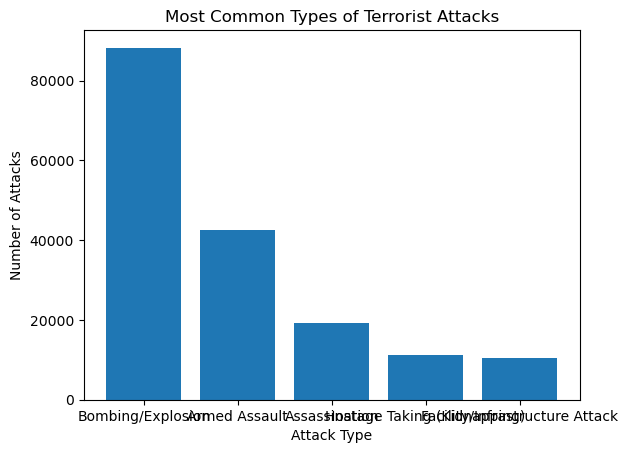

In [115]:
# Bar chart for attack types
attack_types = New_data['Attack_type'].value_counts().head(5)
plt.bar(attack_types.index, attack_types.values)
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.title('Most Common Types of Terrorist Attacks')
plt.show()

 **Analyze Key Questions**
 
1. Countries with Highest Number of Terrorist Attacks
- Iraq, Pakistan, Afghanistan, India, and Nigeria are among the countries with the highest number of terrorist attacks.

2. Most Common Types of Terrorist Attacks
- Bombings, armed assaults, and assassinations are among the most common types of terrorist attacks.

3. Trend of Terrorist Attacks Over the Years


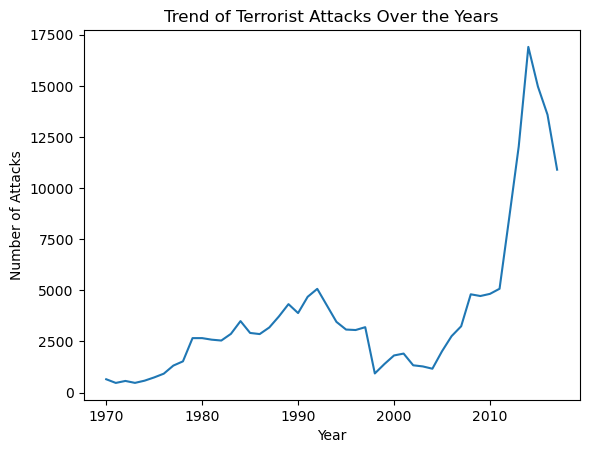

In [120]:
yearly_attacks = New_data['Year'].value_counts().sort_index()
plt.plot(yearly_attacks.index, yearly_attacks.values)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Trend of Terrorist Attacks Over the Years')
plt.show()

# **Most Active Terrorist Organizations**


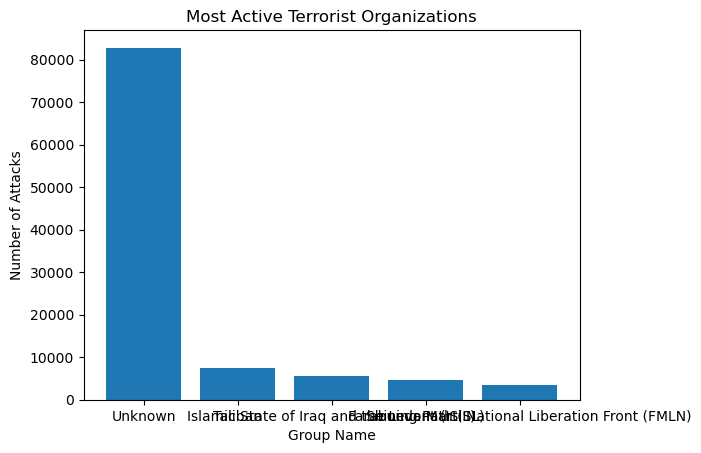

In [150]:
group_attacks = New_data['Group'].value_counts().head(5)
plt.bar(group_attacks.index, group_attacks.values)
plt.xlabel('Group Name')
plt.ylabel('Number of Attacks')
plt.title('Most Active Terrorist Organizations')
plt.show()

**Seasonal Trends in Terrorist Attacks**

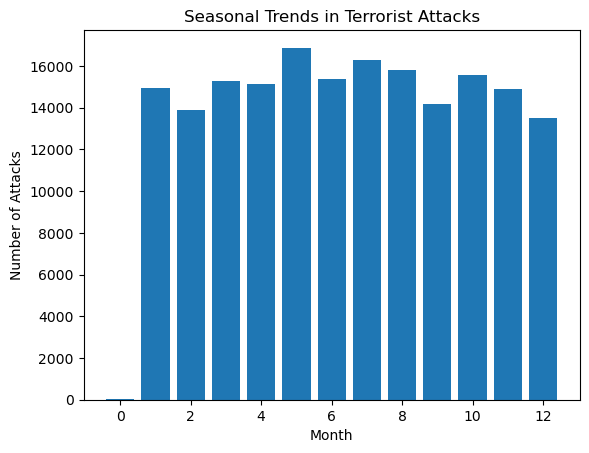

In [152]:
monthly_attacks = New_data['Month'].value_counts().sort_index()
plt.bar(monthly_attacks.index, monthly_attacks.values)
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.title('Seasonal Trends in Terrorist Attacks')
plt.show()

**Dominant Terrorist Group in Nigeria**

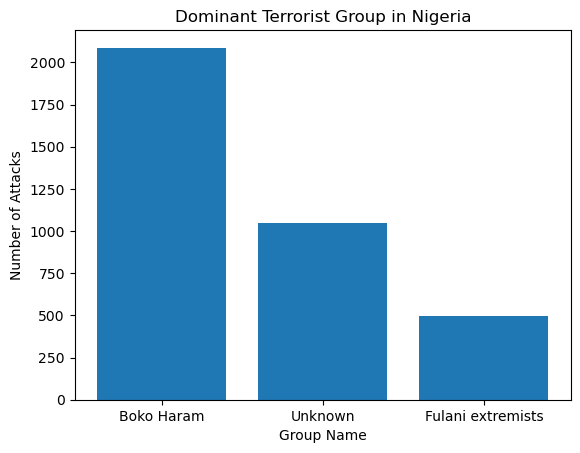

In [162]:
nigeria_df = New_data[New_data['Country'] == 'Nigeria']
nigeria_group_attacks = nigeria_df['Group'].value_counts().head(3)
plt.bar(nigeria_group_attacks.index, nigeria_group_attacks.values)
plt.xlabel('Group Name')
plt.ylabel('Number of Attacks')
plt.title('Dominant Terrorist Group in Nigeria')
plt.show()

**Greatest Target of Boko Haram in Nigeria**

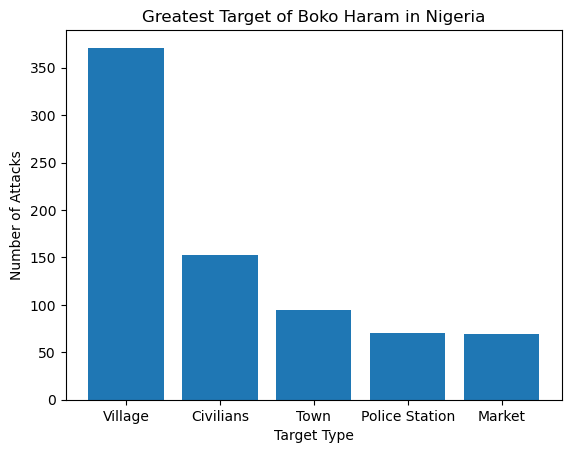

In [172]:
boko_haram_df = nigeria_df[nigeria_df['Group'] == 'Boko Haram']
target_attacks = boko_haram_df['Target'].value_counts().head(5)
plt.bar(target_attacks.index, target_attacks.values)
plt.xlabel('Target Type')
plt.ylabel('Number of Attacks')
plt.title('Greatest Target of Boko Haram in Nigeria')
plt.show()

## **The analysis reveals that Boko Haram's top targets in Nigeria include:**

1. Private Citizens & Property: Frequent attacks on civilians aim to instill fear and disrupt daily life.
2. Military: Targeting military personnel and installations weakens the government's security apparatus.
3. Police: Attacks on police forces undermine law enforcement and governance.
4. Government (General): Targeting government buildings, officials, and institutions challenges the authority of the Nigerian government.
5. Religious Figures/Institutions: Attacks may indicate sectarian tensions or attempts to impose the group's ideology.

   **Conclusion**
The data suggests that Boko Haram's strategy involves targeting both security forces and civilians, aiming to destabilize the region and challenge the government's authority. To effectively counter this threat, the government may consider:
- Enhanced Security Measures: Strengthening security forces and intelligence gathering to prevent attacks on military, police, and government targets.
- Civilian Protection: Implementing measures to protect private citizens and property, potentially through community engagement and outreach programs.
- Countering Ideology: Developing strategies to counter Boko Haram's ideology and reduce recruitment, possibly through education and social programs.
- Regional Cooperation: Collaborating with regional partners to share intelligence and coordinate efforts to combat Boko Haram's activities. reframe well?